In [1]:
import numpy as np
import pandas as pd
from plotnine import *

Matplotlib is building the font cache; this may take a moment.


In [2]:
SAMPLE_SIZE = 1000

### 1) Sample and Population Comparison

It is intuitive that a sample becomes more representative of population as the sample size increases. Let us now see this in action.
- Generate a list of samples from a Standard Normal distribution (i.e., with zero mean and unit standard deviation). Vary sample size between $5$ and $985$ in intervals of $20$. You should get list with $50$ elements of size $5,25,45,\cdots,985$ respectively. You can use $\texttt{random.normal}$ function from numpy for sampling from a Normal distribution.
- Create two lists (of length $50$ each) for mean and standard deviation of each of those samples.
- Create dataframe with SampleSize, Mean and StandardDeviation columns.

In [93]:
mean_list = []
std_list = []
sample_size =[]
for i in range(5,1005,20):
    data= np.random.standard_normal(i)
    mean_list.append(np.mean(data))
    std_list.append(np.std(data,ddof=1))
    sample_size.append(i)
df = pd.DataFrame(list(zip(sample_size,mean_list,std_list)),columns = ['SampleSize','Mean','StandardDeviation'])

In [94]:
df_y =pd.melt(df,id_vars=['SampleSize'],value_vars=['Mean','StandardDeviation'])

/usr/lib/python3.7/site-packages/plotnine/facets/facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
/usr/lib/python3.7/site-packages/plotnine/facets/facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead


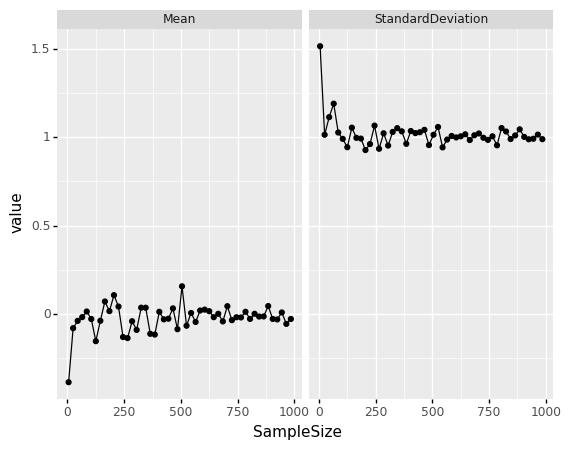

<ggplot: (8747752484369)>

In [95]:
from plotnine import ggplot
(
    ggplot(df_y)
    +aes(x="SampleSize",y='value')
    +geom_point()
    +geom_line()
    +xlab("SampleSize")
    +facet_grid('.~variable')
    
)

### 2) Law of Large Numbers

Law of large numbers (roughly) states that average of results from a large number of trials becomes close to the expected value as number of trials becomes large. Since we are afraid of proofs, we would be empirically testing it out.

Roll a fair die 1000 times, compute the running average of rolls and plot it. More specifically:
- Generate 1000 samples of a six-sided die roll using numpy's $\texttt{random.randint}$ function. You may call this array val_roll.
- Create dataframe with val_roll column from above as well as a num_roll column with information on roll number.
- Add a running_average column to your dataframe. Note that this can directly be derived using the other two columns (and pandas $\texttt{cumsum}$ functionality).
- Create a line plot between num_roll and running_average.

In [20]:
val_roll = [np.random.randint(1,6) for i in range(1000)]
num_roll = [i for i in range(1,1001)]
df2 = pd.DataFrame(list(zip(num_roll,val_roll)),columns=['num_roll','val_roll'])
df2['running_average'] = df['val_roll'].cumsum() / df['num_roll']
df2.head()

,num_roll,val_roll,running_average
0,1,1,2.000000
1,2,2,3.000000
2,3,4,2.333333
3,4,2,2.000000
4,5,2,2.200000


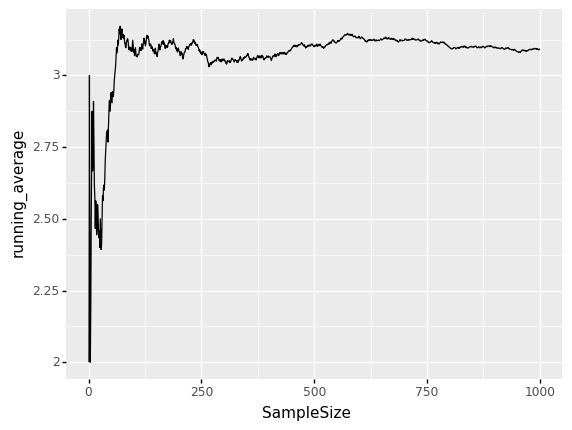

<ggplot: (8747777103385)>

In [24]:
from plotnine import ggplot
(
    ggplot(df2)
    +aes(x="num_roll",y='running_average')
    +geom_line()
    +xlab("SampleSize")
)

### 3) Visualizing Distribution (Differences) 
Obtain samples from each of the distributions below, and plot their density plots on same figure. Set opacity (alpha) to $0.5$ for all plots.

- Standard Normal. Fill with skyblue.
- Normal with $3$ mean and $3$ standard deviation. Fill with navy.
- Binomial with $10$ trials and $0.4$ probability of success. Fill with black. Do you find anything strange about this density plot?
- Poisson with $0.7$ rate parameter $\lambda$. Fill with pink.
- Geometric with $0.7$ probability of success of individual trial. Fill with green.

In [43]:
sn = np.random.standard_normal(1000)
n = np.random.normal(3,3,1000)
b=  np.random.binomial(10, 0.4, 1000)
p = np.random.poisson(0.7, 1000)
g=  np.random.geometric(p=0.7, size=1000)


In [44]:
df3 = pd.DataFrame(list(zip(sn,n,b,p,g)),columns=['StandardNormal',"Normal","Binomial","Possion","Geometric"])

In [45]:
data = pd.melt(df3)

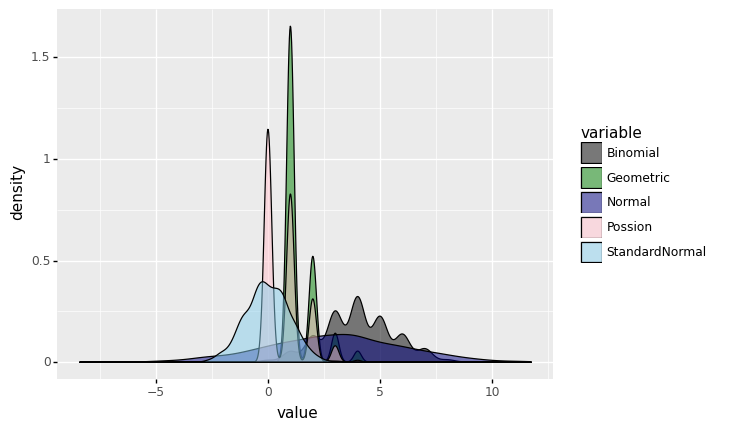

<ggplot: (8747777222481)>

In [50]:
from plotnine import ggplot

color_dict ={'StandardNormal': "skyblue",
              'Normal':'navy',
               'Binomial':'black',
                'Possion':'pink',
                'Geometric':'green'
                
}

(
    ggplot(data)
    +aes(x="value",fill='variable')
    +scale_fill_manual(values=color_dict)
    +geom_density(alpha=0.5)
  
)

### 4) Poisson Approximation to Binomial Distribution
You may remember from some introductory probability course that Poisson distribution (with $\lambda = np$) can be used to approximate Binomial distribution approximation when $n$ is large and $p$ is very small. You may still wonder how large $n$ and how small $p$ (work in practice). Better find out right now.

Plot density plots for Binomial and Poisson distribution for $n=1000$ and $p=0.8$. Fill them with different colors for identification. Set alpha to $0.3$ to clearly visualize overlap.

In [60]:
b=  np.random.binomial(1000, 0.8,1000)
p = np.random.poisson(800, 1000)
df4a = pd.DataFrame(list(zip(b,p)),columns=["Binomial","Possion"])

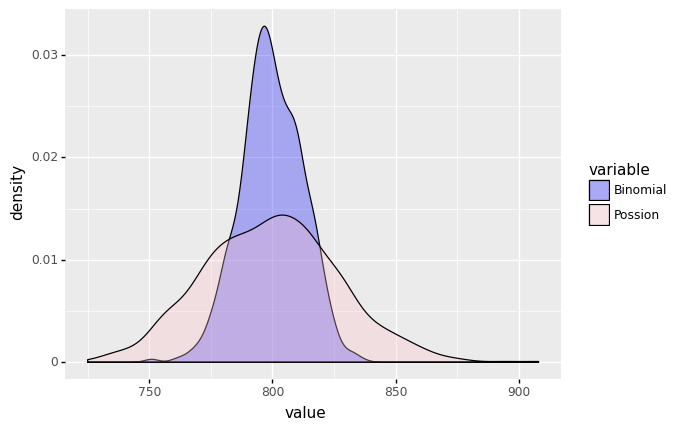

<ggplot: (8747753311585)>

In [61]:
from plotnine import ggplot
data = pd.melt(df4a)
color_dict ={
               'Binomial':'blue',
                'Possion':'pink'
               
                
}

(
    ggplot(data)
    +aes(x="value",fill='variable')
    +scale_fill_manual(values=color_dict)
    +geom_density(alpha=0.3)
  
)

Plot density plots for Binomial and Poisson distribution for $n=1000$ and $p=0.08$. Fill them with different colors for identification. Set alpha to $0.3$ to clearly visualize overlap.

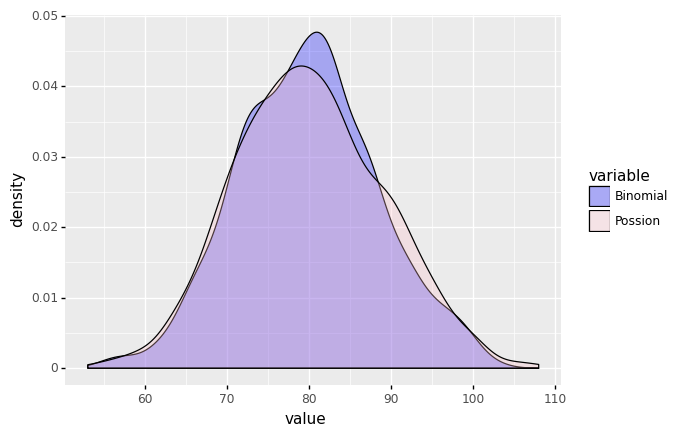

<ggplot: (8747752847701)>

In [89]:
b=  np.random.binomial(1000, 0.08,1000)
p = np.random.poisson(80, 1000)
df4b = pd.DataFrame(list(zip(b,p)),columns=["Binomial","Possion"])
from plotnine import ggplot
data = pd.melt(df4b)
color_dict ={
               'Binomial':'blue',
                'Possion':'pink'
               
                
}

(
    ggplot(data)
    +aes(x="value",fill='variable')
    +scale_fill_manual(values=color_dict)
    +geom_density(alpha=0.3)
  
)

### 5) Central Limit Theorem

Another central concept we often come across in elementary probability course is that of Central Limit Theorem (CLT). It tells us that sampling distribution of the _mean_ becomes normally distributed for large enough sample size, _regardless_ of the data distribution. We would now visually demonstrate CLT.

- Generate a list of length 25000 of samples from any distribution with any parameters (you can even use the Binomial distribution from previous question) and large sample size (default SAMPLE_SIZE is large enough). Note that this is similar to the first question, except that sample size is not changing now and we are not restricted to standard normal.
- Create a list of means of each of those samples.
- Create a dataframe with means column generated from list above, and plot a histogram using ggplot.

In [76]:
mean_list = []
num_trial = []
for idx in range(1,25001):
    mean_list.append(np.mean(np.random.poisson(0.7, 1000)))
    num_trial.append(idx)


In [77]:
df5 = pd.DataFrame(list(zip(num_trial,mean_list)),columns = ['num_trial','mean_list'])

/usr/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 93'. Pick better value with 'binwidth'.


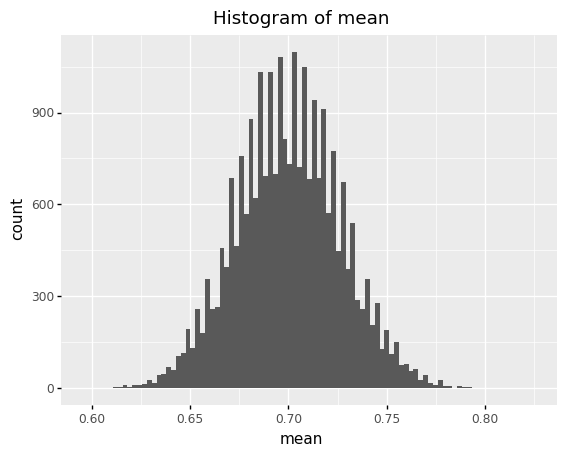

<ggplot: (8747752991097)>

In [78]:
from plotnine import ggplot

(
    ggplot(df5)
    +aes(x='mean_list')
    +geom_histogram()
    +ggtitle("Histogram of mean")
    +ylab("count")
    +xlab("mean")
)

(b) Study the effect of increasing the sample size to smoothness in the distribution:
Plot the exponential distribution for following sample sizes: 10,100,1000

Note: Use the default bin size for all the histogram plots.

/usr/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 3'. Pick better value with 'binwidth'.


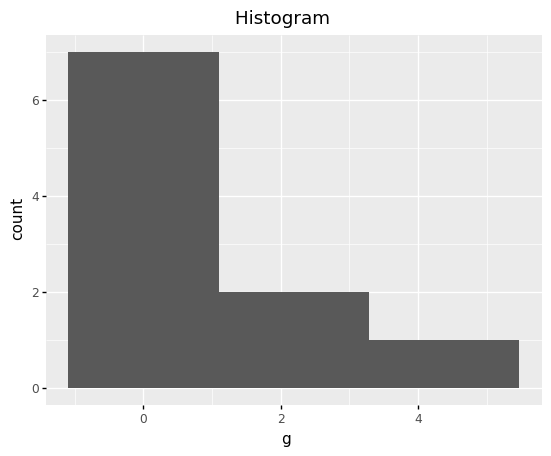

<ggplot: (8747752489133)>

In [86]:
g = np.random.exponential(1,10)
df = pd.DataFrame(g, columns=['g'])

from plotnine import ggplot

(
    ggplot(df)
    +aes(x='g')
    +geom_histogram()
    +ggtitle("Histogram ")
    
)

/usr/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 10'. Pick better value with 'binwidth'.


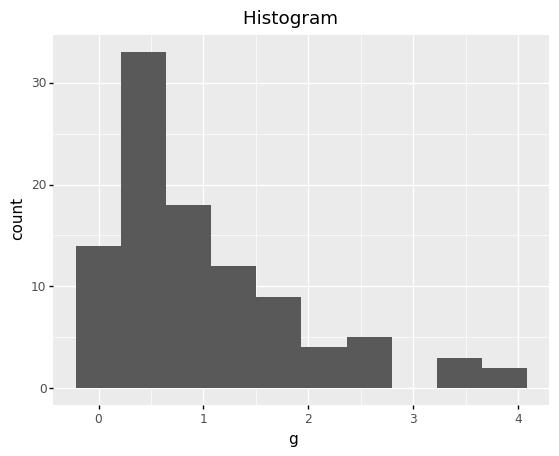

<ggplot: (8747753454393)>

In [87]:
g = np.random.exponential(1,100)
df = pd.DataFrame(g, columns=['g'])

from plotnine import ggplot

(
    ggplot(df)
    +aes(x='g')
    +geom_histogram()
    +ggtitle("Histogram ")
    
)

/usr/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 33'. Pick better value with 'binwidth'.


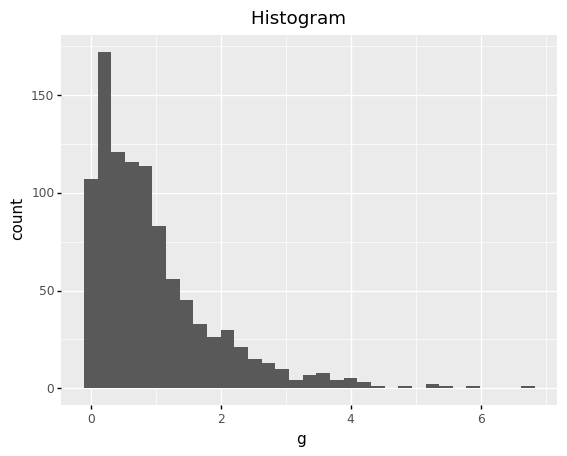

<ggplot: (8747752951313)>

In [88]:
g = np.random.exponential(1,1000)
df = pd.DataFrame(g, columns=['g'])

from plotnine import ggplot

(
    ggplot(df)
    +aes(x='g')
    +geom_histogram()
    +ggtitle("Histogram ")
    
)
